In [1]:
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt

from pgg_env import PGGParallelEnv
from agents import make_pgg_agents
from loop_pgg import run_simulation

from analysis_PGG import (
    coop_timecourse_mean_sd,
    mean_coop,
    cc_mcc,
    alpha_fit_polyfit
)

SEED = 123
rng = np.random.default_rng(SEED)
# fix parameters
EPSILON = 0.2
P_INIT = 0.5
GRID_SIZE = 10
X_tresh = 0.4  # Treshold for cooperation
p_init_mode = "random"

In [2]:
def make_env(tmax, fr):
    return PGGParallelEnv(ep_leng=tmax, n_fr=fr)

def make_agents_list(n_agents, A, beta, p_init, tresh=0.5):
    return make_pgg_agents(n_agents, A=A, beta=beta, p_init=p_init, coop_threshold=tresh)

def run_trials(A, beta, tmax, n_trials, seed=SEED, p_init=P_INIT, treshold = 0.5, free_rider = 0):
    env = make_env(tmax=tmax, fr = free_rider)
    agents = make_agents_list(env.n_agents, A=A, beta=beta, p_init=p_init, tresh=treshold)
    actions_all, rewards_all, p_all, _ = run_simulation(
        env=env,
        agents=agents,
        n_episodes=n_trials,
        ep_lenght_max=tmax,
        seed=seed,
        render=False
    )

    return env, actions_all, rewards_all, p_all


### First Test

In [3]:
tmax_3 = 25
n_trials_3 = 2500 # augmente pour 1000

fig3_settings = [
    ("A", 1),
    ("B", 2),
]

fig3_curves = {}

for label, Fr in fig3_settings:
    env, actions_all, _, _ = run_trials(
        A=0.9, beta=0.4, tmax=tmax_3, n_trials=n_trials_3, treshold=0.4, free_rider = Fr
    )

    curves = cc_mcc(actions_all, t_start=1, t_end=tmax_3, tresh=0.4, fr_list=env.fr)
    fig3_curves[label] = (curves, Fr)

print("Done Fig 3 sims.")

Done Fig 3 sims.


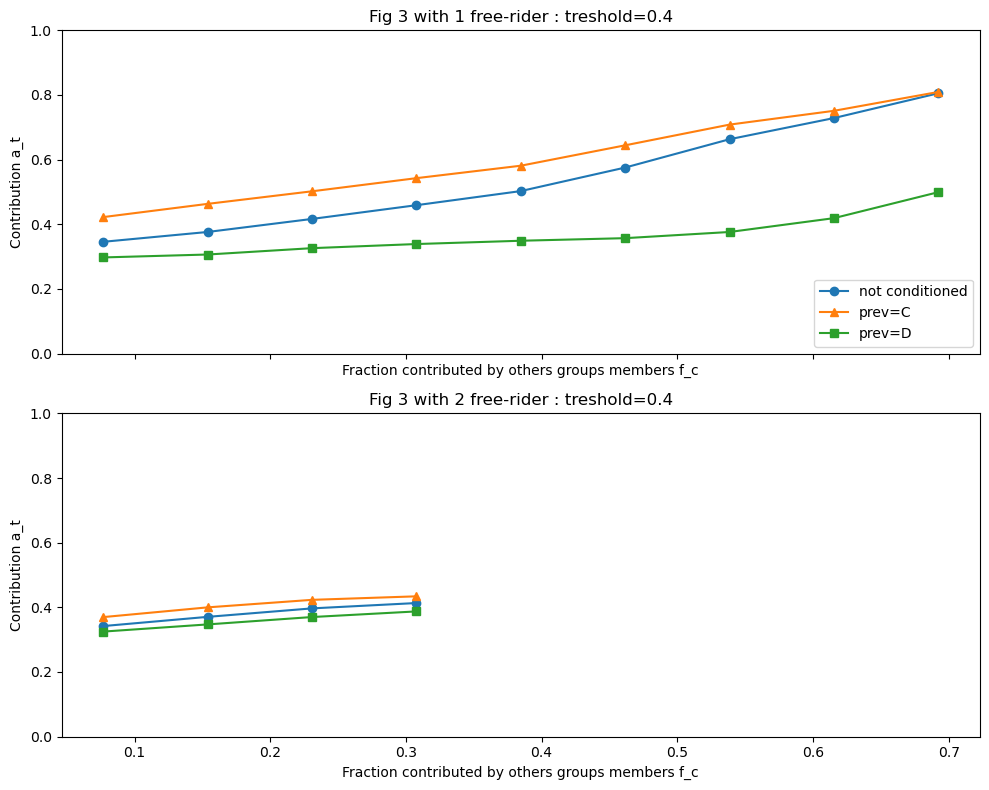

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (label, F) in zip(axes, fig3_settings):
    curves, X_tresh = fig3_curves[label]
    f = curves["f_vals"]

    ax.plot(f, curves["pC"], marker="o", label="not conditioned")
    ax.plot(f, curves["pC_C"], marker="^", label="prev=C")
    ax.plot(f, curves["pC_D"], marker="s", label="prev=D")

    ax.set_title(f"Fig 3 with {F} free-rider : treshold={0.4}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("Fraction contributed by others groups members f_c")
    ax.set_ylabel("Contribution a_t")

axes[0].legend(loc="lower right")
plt.tight_layout()
plt.show()
